# Data Cleaning

In [2]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
#!pip install openpyxl


## Game of thrones deaths (only_deaths dataset)

https://www.kaggle.com/datasets/shitalgaikwad123/gameofthonesdeaths

In [4]:
only_deaths = pd.read_excel('../raw_data/only_dead.xlsx', skiprows=1)


In [5]:
only_deaths_original = pd.read_excel('../raw_data/only_dead.xlsx', skiprows=1)


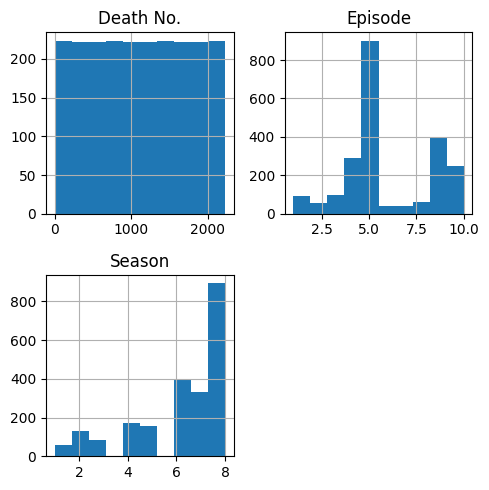

In [6]:
only_deaths_original.hist(figsize = (5, 5))

plt.tight_layout()


In [7]:
only_deaths_original.dtypes


Allegiance       object
Death No.         int64
Episode           int64
Killer           object
Killers House    object
Location         object
Method           object
Name             object
Season            int64
dtype: object

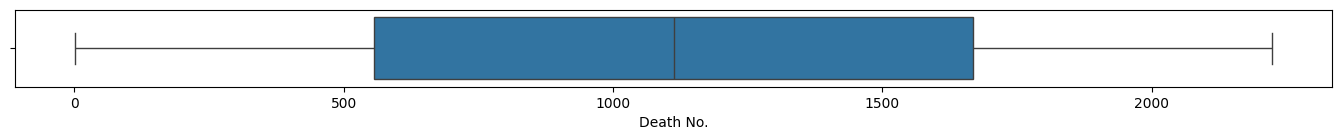

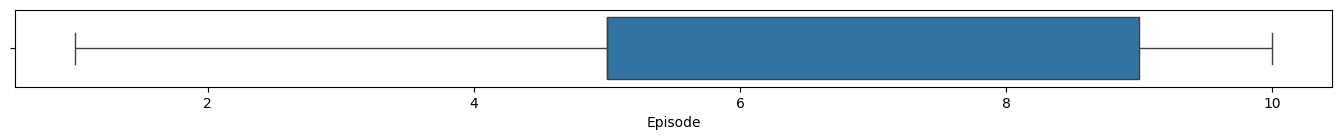

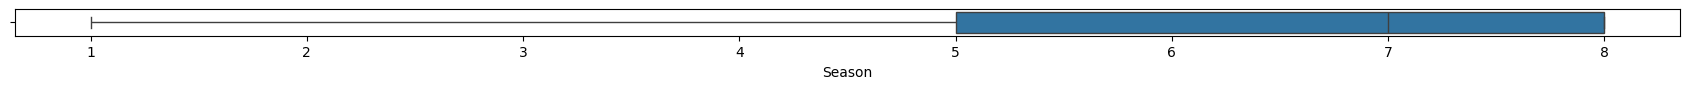

In [8]:
only_deaths_original_numeric=only_deaths_original.select_dtypes(exclude=['object'])
for column in only_deaths_original_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=only_deaths_original, x=column)
plt.tight_layout()


In [9]:
only_deaths.head()


,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season
0,Night's Watch,1,1,White Walker,NaN,Beyond the Wall,Ice sword,Waymar Royce,1
1,Night's Watch,2,1,White Walker,NaN,Beyond the Wall,Ice sword,Gared,1
2,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1
3,NaN,4,1,Direwolf,NaN,Winterfell,Teeth,Stag,1
4,NaN,5,1,Stag,NaN,Winterfell,Antler,Direwolf,1


In [10]:
only_deaths_shape = only_deaths.shape
only_deaths_shape


(2224, 9)

In [11]:
only_deaths_cols = only_deaths.columns
only_deaths_cols


Index(['Allegiance', 'Death No.', 'Episode', 'Killer', 'Killers House',
       'Location', 'Method', 'Name', 'Season'],
      dtype='object')

In [12]:
only_deaths.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Allegiance     1792 non-null   object
 1   Death No.      2224 non-null   int64 
 2   Episode        2224 non-null   int64 
 3   Killer         2214 non-null   object
 4   Killers House  2194 non-null   object
 5   Location       2224 non-null   object
 6   Method         2224 non-null   object
 7   Name           2224 non-null   object
 8   Season         2224 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 156.5+ KB


In [13]:
only_deaths.duplicated().sum()


0

In [14]:
only_deaths.isna().sum()


Allegiance       432
Death No.          0
Episode            0
Killer            10
Killers House     30
Location           0
Method             0
Name               0
Season             0
dtype: int64

In [15]:
for col in only_deaths_cols:
    print(col,'   nunique:',len(only_deaths[col].value_counts()))
    print('/n')
    print(only_deaths[col].value_counts())
    print('/n')


Allegiance    nunique: 40
/n
Allegiance
House Lannister                      835
House Stark                          121
Free Folk                            121
Night's Watch                         79
Sons of the Harpy                     68
House Targaryen                       68
House Bolton                          68
House Baratheon of Dragonstone        67
House Frey                            62
Faith Militant                        52
Smallfolk                             44
House Greyjoy                         41
Dothraki                              23
House Baratheon of King's Landing     22
The Masters                           14
The Thirteen                          12
Wise Masters                          12
Brotherhood Without Banners           10
House Martell                          8
House Mormont                          8
Good Masters                           7
Great Masters                          6
House Baelish                          6
Children of the F

In [16]:
only_deaths_cols


Index(['Allegiance', 'Death No.', 'Episode', 'Killer', 'Killers House',
       'Location', 'Method', 'Name', 'Season'],
      dtype='object')

In [17]:
only_deaths_shape


(2224, 9)

In [18]:
#get rows that have "King's Landing" on name
only_deaths['Name'].str.contains("King's Landing").sum()


389

In [19]:
only_deaths_cols = only_deaths.columns


In [20]:
only_deaths_cols_without_deathno = only_deaths_cols.copy().to_list()


In [21]:
only_deaths_cols_without_deathno


['Allegiance',
 'Death No.',
 'Episode',
 'Killer',
 'Killers House',
 'Location',
 'Method',
 'Name',
 'Season']

In [22]:
only_deaths_cols_without_deathno.remove('Death No.')


In [23]:
only_deaths_cols


Index(['Allegiance', 'Death No.', 'Episode', 'Killer', 'Killers House',
       'Location', 'Method', 'Name', 'Season'],
      dtype='object')

In [24]:
only_deaths_cols_without_deathno


['Allegiance',
 'Episode',
 'Killer',
 'Killers House',
 'Location',
 'Method',
 'Name',
 'Season']

In [25]:
only_deaths.duplicated(subset=only_deaths_cols_without_deathno).sum()


1737

In [26]:
only_deaths.shape


(2224, 9)

In [27]:
only_deaths_wo_deathno = only_deaths.drop('Death No.',axis=1)


In [28]:
only_deaths_wo_deathno.duplicated().sum()


1737

In [29]:
2224-1737


487

In [30]:
only_deaths_wo_deathno.head()


,Allegiance,Episode,Killer,Killers House,Location,Method,Name,Season
0,Night's Watch,1,White Walker,NaN,Beyond the Wall,Ice sword,Waymar Royce,1
1,Night's Watch,1,White Walker,NaN,Beyond the Wall,Ice sword,Gared,1
2,Night's Watch,1,Ned Stark,House Stark,Winterfell,Sword,Will,1
3,NaN,1,Direwolf,NaN,Winterfell,Teeth,Stag,1
4,NaN,1,Stag,NaN,Winterfell,Antler,Direwolf,1


In [31]:
only_deaths_wo_deathno.Episode.value_counts()


Episode
5     899
9     400
4     292
10    249
3      96
1      90
8      60
2      56
6      42
7      40
Name: count, dtype: int64

In [32]:
only_deaths_wo_deathno.Season.value_counts()


Season
8    892
6    396
7    334
4    170
5    158
2    130
3     86
1     58
Name: count, dtype: int64

In [33]:
# Function to calculate number of episode in total, not per season
def calculate_global_episode(row):
    if row['Season'] == 1:
        return row['Episode']
    elif row['Season'] == 2:
        return 10 + row['Episode']
    elif row['Season'] == 3:
        return 20 + row['Episode']
    elif row['Season'] == 4:
        return 30 + row['Episode']
    elif row['Season'] == 5:
        return 40 + row['Episode']
    elif row['Season'] == 6:
        return 50 + row['Episode']
    elif row['Season'] == 7:
        return 60 + row['Episode']
    elif row['Season'] == 8:
        return 67 + row['Episode']


In [34]:
only_deaths_wo_deathno['episode_global_num'] = only_deaths_wo_deathno.apply(calculate_global_episode, axis=1)


In [35]:
only_deaths_wo_deathno.episode_global_num.max()


73

In [36]:
only_deaths_original.shape, only_deaths_original.columns


((2224, 9),
 Index(['Allegiance', 'Death No.', 'Episode', 'Killer', 'Killers House',
        'Location', 'Method', 'Name', 'Season'],
       dtype='object'))

In [37]:
only_deaths_wo_deathno.shape, only_deaths_wo_deathno.columns


((2224, 9),
 Index(['Allegiance', 'Episode', 'Killer', 'Killers House', 'Location',
        'Method', 'Name', 'Season', 'episode_global_num'],
       dtype='object'))

In [38]:
## Calculate weight_simple
# Calculate frequency
frequency = only_deaths_wo_deathno['Name'].value_counts()

# Calculate total observations
total_observations = len(only_deaths_wo_deathno)

# Calculate percentage of appearance
percentage_appearance = frequency / total_observations * 100

# Calculate inverse percentage
inverse_percentage = 100 - percentage_appearance

# Normalize weights to
weights = inverse_percentage/100

# Map weights back to the original dataframe
only_deaths_wo_deathno['weights_simple'] = only_deaths_wo_deathno['Name'].map(weights)


In [39]:
only_deaths_wo_deathno.weights_simple.min(), only_deaths_wo_deathno.weights_simple.max()


(0.8026079136690647, 0.9995503597122303)

<Axes: >

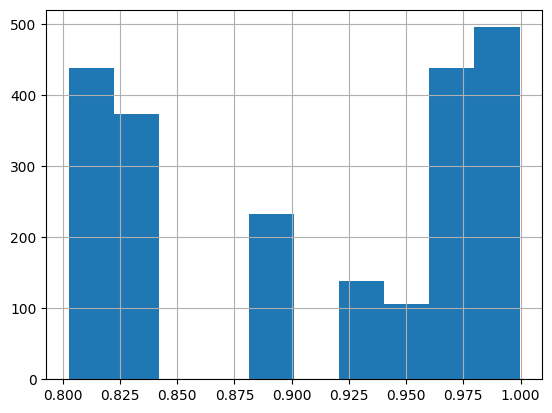

In [40]:
only_deaths_wo_deathno.weights_simple.hist()


In [41]:
only_deaths_wo_deathno.drop(labels=['Episode', 'Season'], axis=1, inplace=True)


In [42]:
only_deaths_wo_deathno.columns = list(map(str.lower,['Allegiance', 'Killer', 'Killers_House', 'Location', 'Method', 'Name',
       'episode_global_num', 'weights_simple']))


In [43]:
#write csv isAlive_updated

#only_deaths_wo_deathno.to_csv('data/20231128_only_deaths_ep_weights.csv')


In [44]:
only_deaths_wo_deathno.shape


(2224, 8)

In [45]:
only_deaths_wo_deathno.duplicated().sum()


1737

In [46]:
2224-1737


487

### character-predictions.csv

The **‘actual’** column contains the life or death state of the characters in the books.

The **‘pred’** column contains the prediction of whether a character will live or die.

The **‘alive’** column contains the probability of a character to stay alive.

The **‘plod’** column contains the probability of a character’s death.

In [47]:
char_preds = pd.read_csv('../raw_data/character-predictions.csv')


In [48]:
char_preds_original = pd.read_csv('../raw_data/character-predictions.csv')


In [49]:
char_preds_cols = char_preds.columns
char_preds_cols


Index(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'title', 'male',
       'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations',
       'isPopular', 'popularity', 'isAlive'],
      dtype='object')

In [50]:
char_preds


,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,0,1,0.803,0.197,Luwin,NaN,1,Westeros,NaN,...,NaN,NaN,0,0,NaN,0,0,1,0.351171,0
1942,1943,0,1,0.987,0.013,Reek,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.096990,0
1943,1944,1,1,0.520,0.480,Symeon Star-Eyes,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.030100,1
1944,1945,1,1,0.637,0.363,Coldhands,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.130435,1


In [51]:
char_preds_droped_cols=['S.No', 'pred', 'actual','alive','plod']


In [52]:
char_preds_shape = char_preds.shape
char_preds_shape


(1946, 33)

In [53]:
char_preds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 non-null    object 
 16  book1              1946 

In [54]:
char_preds_droped_cols = char_preds_droped_cols + ['isPopular','culture','dateOfBirth','DateoFdeath', 'age', 'title','mother','father','heir','spouse','isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse']


In [55]:
char_preds.drop(labels=char_preds_droped_cols, axis=1, inplace=True)


In [56]:
char_preds.duplicated().sum()


0

** Deleted: culture,dateOfBirth,DateoFdeath,age**

We could keep them only if the webscrapping can fill the NAs

Feature               NAs

culture              1269

dateOfBirth          1513

DateoFdeath          1502

age                  1513

We leave the culture for the age character history but not for the model prediction

In [57]:
#char_preds.culture.value_counts()


In [58]:
char_preds.house.value_counts()


house
Night's Watch      105
House Frey          97
House Stark         72
House Targaryen     62
House Lannister     49
                  ... 
House Gower          1
House Borrell        1
Citadel              1
Wise Masters         1
Three-eyed crow      1
Name: count, Length: 347, dtype: int64

In [59]:
char_preds["house"]=char_preds["house"].fillna("No house")


In [60]:
char_preds.isna().sum()


name                 0
male                 0
house                0
book1                0
book2                0
book3                0
book4                0
book5                0
isMarried            0
isNoble              0
numDeadRelations     0
boolDeadRelations    0
popularity           0
isAlive              0
dtype: int64

<Axes: >

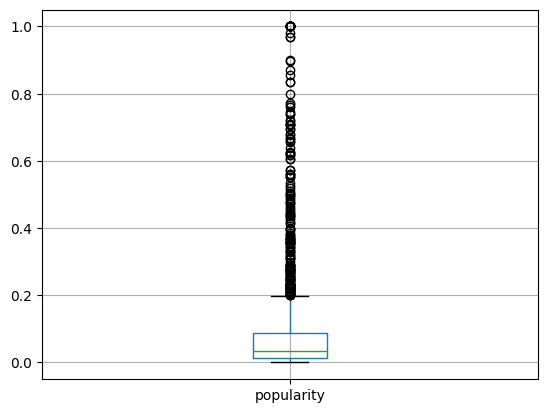

In [61]:
char_preds.boxplot("popularity")


<Axes: >

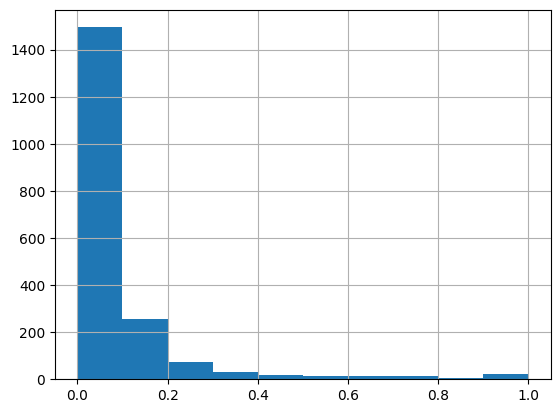

In [62]:
char_preds.popularity.hist()


In [63]:
#char_preds.to_csv('data/20231127_char_pred.csv')


In [64]:
#!ls data


In [65]:
char_preds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1946 non-null   object 
 1   male               1946 non-null   int64  
 2   house              1946 non-null   object 
 3   book1              1946 non-null   int64  
 4   book2              1946 non-null   int64  
 5   book3              1946 non-null   int64  
 6   book4              1946 non-null   int64  
 7   book5              1946 non-null   int64  
 8   isMarried          1946 non-null   int64  
 9   isNoble            1946 non-null   int64  
 10  numDeadRelations   1946 non-null   int64  
 11  boolDeadRelations  1946 non-null   int64  
 12  popularity         1946 non-null   float64
 13  isAlive            1946 non-null   int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 213.0+ KB


In [66]:
char_preds.male.value_counts()


male
1    1205
0     741
Name: count, dtype: int64

In [67]:
char_preds.house.value_counts()


house
No house           427
Night's Watch      105
House Frey          97
House Stark         72
House Targaryen     62
                  ... 
House Gower          1
House Borrell        1
Citadel              1
Wise Masters         1
Three-eyed crow      1
Name: count, Length: 348, dtype: int64

In [68]:
char_preds.book1.value_counts()


book1
0    1560
1     386
Name: count, dtype: int64

In [69]:
char_preds.book2.value_counts()


book2
0    1217
1     729
Name: count, dtype: int64

In [70]:
char_preds.book3.value_counts()


book3
0    1011
1     935
Name: count, dtype: int64

In [71]:
char_preds.book4.value_counts()


book4
1    1152
0     794
Name: count, dtype: int64

In [72]:
char_preds.book5.value_counts()


book5
0    1177
1     769
Name: count, dtype: int64

In [73]:
char_preds.isAlive.value_counts()/len(char_preds)


isAlive
1    0.745632
0    0.254368
Name: count, dtype: float64

In [74]:
char_preds.numDeadRelations.value_counts()


numDeadRelations
0     1801
1       49
5       25
4       18
2       12
7       10
6        8
10       5
8        5
3        4
11       3
12       2
15       2
9        2
Name: count, dtype: int64

<Axes: >

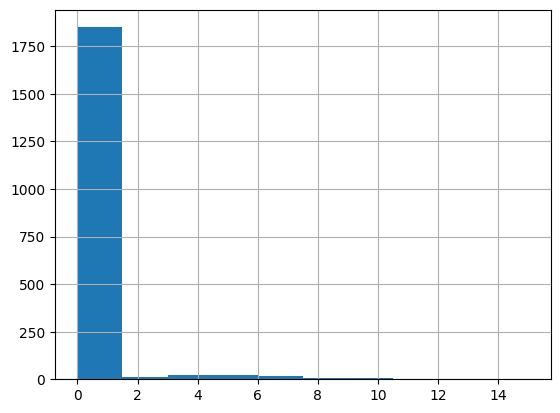

In [75]:
char_preds.numDeadRelations.hist()


<Axes: >

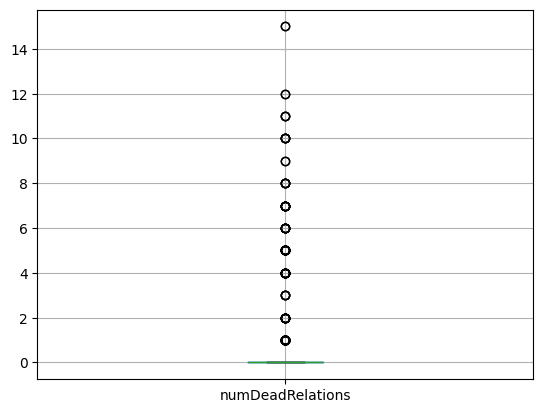

In [76]:
char_preds.boxplot("numDeadRelations")


### Getting alliance column from only_deaths.Allegiance to char_preds for each row by name

In [77]:
only_deaths.Name.nunique()


253

In [78]:
only_deaths.Name.value_counts()


Name
Lannister soldier          439
Golden Company soldier     374
King's Landing Citizen     233
King's Landing Noble       138
Wildling                   106
                          ... 
Joyeuse Frey                 1
Catelyn Stark                1
Lowell (King's Soldier)      1
Polliver                     1
Daenerys Targaryen           1
Name: count, Length: 253, dtype: int64

In [79]:
only_deaths.shape


(2224, 9)

In [80]:
char_preds.name.nunique()


1946

In [81]:
char_preds.shape


(1946, 14)

In [82]:
char_preds.name.value_counts()


name
Viserys II Targaryen        1
Otho Bracken                1
Raymund Frey                1
Raynard Ruttiger            1
Red Alyn of the Rosewood    1
                           ..
Jon Cupps                   1
Jommy                       1
Jommo                       1
Johanna Swann               1
Tytos Lannister             1
Name: count, Length: 1946, dtype: int64

In [83]:
only_deaths.rename(columns={'Name':'name'}, inplace=True)


In [84]:
# Checking common values
common_values_onlydeaths_char_preds = only_deaths[only_deaths['name'].isin(char_preds['name'])]

# Values in char_preds not in only_deaths
values_in_char_preds_not_in_only_deaths = char_preds[~char_preds['name'].isin(only_deaths['name'])]

# Values in only_deaths not in char_preds
values_in_only_deaths_not_in_char_preds = only_deaths[~only_deaths['name'].isin(char_preds['name'])]


In [85]:
common_values_onlydeaths_char_preds


,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,name,Season
0,Night's Watch,1,1,White Walker,NaN,Beyond the Wall,Ice sword,Waymar Royce,1
1,Night's Watch,2,1,White Walker,NaN,Beyond the Wall,Ice sword,Gared,1
2,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1
5,House Arryn,6,1,Lysa Arryn,House Arryn,King's Landing,Poison,Jon Arryn,1
8,Smallfolk,9,2,"Sandor ""the Hound"" Clegane",House Lannister,Kingsroad,Sword,Mycah,1
...,...,...,...,...,...,...,...,...,...
1979,House Lannister,2223,5,Daenerys Targaryen,House Targaryen,King's Landing,Rubble,Cersei Lannister,8
1980,House Lannister,2222,5,Daenerys Targaryen,House Targaryen,King's Landing,Rubble,Jaime Lannister,8
1981,House Lannister,1780,5,Grey Worm,House Targaryen,King's Landing,Spear,Harry Strickland,8
1995,House Targaryen,1380,5,Daenerys Targaryen,House Targaryen,Dragonstone,Dragonfire (Dragon),Varys,8


In [86]:
values_in_char_preds_not_in_only_deaths


,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive
0,Viserys II Targaryen,1,No house,0,0,0,0,0,0,0,11,1,0.605351,0
2,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0.267559,1
3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0
4,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,0,0,0.043478,1
6,Valarr Targaryen,1,House Targaryen,0,0,0,0,0,1,1,0,0,0.431438,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,0.351171,0
1942,Reek,1,House Bolton,0,1,0,1,1,0,0,0,0,0.096990,0
1943,Symeon Star-Eyes,1,No house,1,1,1,1,1,0,0,0,0,0.030100,1
1944,Coldhands,1,Three-eyed crow,0,0,1,1,1,0,0,0,0,0.130435,1


In [87]:
values_in_char_preds_not_in_only_deaths.name.nunique()


1830

In [88]:
values_in_only_deaths_not_in_char_preds


,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,name,Season
3,NaN,4,1,Direwolf,NaN,Winterfell,Teeth,Stag,1
4,NaN,5,1,Stag,NaN,Winterfell,Antler,Direwolf,1
6,Dothraki,7,1,Dothraki man,Dothraki,Pentos,Arakh,Dothraki man,1
7,NaN,8,2,Summer,House Stark,Winterfell,Teeth,Catspaw assassin,1
9,House Stark,10,2,Ned Stark,House Stark,Kingsroad,Knife,Lady,1
...,...,...,...,...,...,...,...,...,...
2218,NaN,2206,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2219,NaN,2207,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2220,NaN,2208,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2221,NaN,2209,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8


In [89]:
values_in_only_deaths_not_in_char_preds=values_in_only_deaths_not_in_char_preds.drop('Death No.',axis=1)


In [90]:
values_in_only_deaths_not_in_char_preds.duplicated().sum()


1737

In [91]:
values_in_only_deaths_not_in_char_preds = values_in_only_deaths_not_in_char_preds.drop_duplicates()


In [92]:
values_in_only_deaths_not_in_char_preds.shape


(370, 8)

In [93]:
values_in_only_deaths_not_in_char_preds


,Allegiance,Episode,Killer,Killers House,Location,Method,name,Season
3,NaN,1,Direwolf,NaN,Winterfell,Teeth,Stag,1
4,NaN,1,Stag,NaN,Winterfell,Antler,Direwolf,1
6,Dothraki,1,Dothraki man,Dothraki,Pentos,Arakh,Dothraki man,1
7,NaN,2,Summer,House Stark,Winterfell,Teeth,Catspaw assassin,1
9,House Stark,2,Ned Stark,House Stark,Kingsroad,Knife,Lady,1
...,...,...,...,...,...,...,...,...
1439,House Lannister,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),Golden Company soldier,8
1813,House Lannister,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),Lannister soldier,8
1982,House Lannister,5,Grey Worm,House Targaryen,King's Landing,Spear,Lannister soldier,8
1994,House Lannister,5,Unsullied,House Targaryen,King's Landing,Spear,Lannister soldier,8


In [94]:
values_in_only_deaths_not_in_char_preds['name'].value_counts()


name
Wildling                   32
Night's Watch brother      24
Lannister soldier          21
Sons of the Harpy agent    19
Peasant                    19
                           ..
Leech                       1
Ros                         1
Astapor soldier             1
Astapor slaver              1
Golden Company soldier      1
Name: count, Length: 137, dtype: int64

In [95]:
only_deaths_wo_deathno


,allegiance,killer,killers_house,location,method,name,episode_global_num,weights_simple
0,Night's Watch,White Walker,NaN,Beyond the Wall,Ice sword,Waymar Royce,1,0.999550
1,Night's Watch,White Walker,NaN,Beyond the Wall,Ice sword,Gared,1,0.999550
2,Night's Watch,Ned Stark,House Stark,Winterfell,Sword,Will,1,0.999550
3,NaN,Direwolf,NaN,Winterfell,Teeth,Stag,1,0.999550
4,NaN,Stag,NaN,Winterfell,Antler,Direwolf,1,0.999550
...,...,...,...,...,...,...,...,...
2219,NaN,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,72,0.895234
2220,NaN,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,72,0.895234
2221,NaN,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,72,0.895234
2222,NaN,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,72,0.895234


In [96]:
only_deaths_wo_deathno_nodupl = only_deaths_wo_deathno.drop_duplicates()


In [97]:
only_deaths_wo_deathno_nodupl


,allegiance,killer,killers_house,location,method,name,episode_global_num,weights_simple
0,Night's Watch,White Walker,NaN,Beyond the Wall,Ice sword,Waymar Royce,1,0.999550
1,Night's Watch,White Walker,NaN,Beyond the Wall,Ice sword,Gared,1,0.999550
2,Night's Watch,Ned Stark,House Stark,Winterfell,Sword,Will,1,0.999550
3,NaN,Direwolf,NaN,Winterfell,Teeth,Stag,1,0.999550
4,NaN,Stag,NaN,Winterfell,Antler,Direwolf,1,0.999550
...,...,...,...,...,...,...,...,...
1982,House Lannister,Grey Worm,House Targaryen,King's Landing,Spear,Lannister soldier,72,0.802608
1994,House Lannister,Unsullied,House Targaryen,King's Landing,Spear,Lannister soldier,72,0.802608
1995,House Targaryen,Daenerys Targaryen,House Targaryen,Dragonstone,Dragonfire (Dragon),Varys,72,0.999550
1996,NaN,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,72,0.895234


In [98]:
only_deaths_original


,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season
0,Night's Watch,1,1,White Walker,NaN,Beyond the Wall,Ice sword,Waymar Royce,1
1,Night's Watch,2,1,White Walker,NaN,Beyond the Wall,Ice sword,Gared,1
2,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1
3,NaN,4,1,Direwolf,NaN,Winterfell,Teeth,Stag,1
4,NaN,5,1,Stag,NaN,Winterfell,Antler,Direwolf,1
...,...,...,...,...,...,...,...,...,...
2219,NaN,2207,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2220,NaN,2208,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2221,NaN,2209,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2222,NaN,2210,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8


In [99]:
char_preds_original


,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,0,1,0.803,0.197,Luwin,NaN,1,Westeros,NaN,...,NaN,NaN,0,0,NaN,0,0,1,0.351171,0
1942,1943,0,1,0.987,0.013,Reek,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.096990,0
1943,1944,1,1,0.520,0.480,Symeon Star-Eyes,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.030100,1
1944,1945,1,1,0.637,0.363,Coldhands,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.130435,1


In [100]:
char_preds_original.columns


Index(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'title', 'male',
       'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations',
       'isPopular', 'popularity', 'isAlive'],
      dtype='object')

## Inverse percentage calculation (only deaths)

In [101]:
# Calculate frequency
frequency = only_deaths_original['Name'].value_counts()

# Calculate total observations
total_observations = len(only_deaths_original)

# Calculate percentage of appearance
percentage_appearance = frequency / total_observations * 100

# Calculate inverse percentage
inverse_percentage = 100 - percentage_appearance

# Normalize weights to
weights = inverse_percentage/100

# Map weights back to the original dataframe
only_deaths_original['weights'] = only_deaths_original['Name'].map(weights)


In [102]:
# Calculate frequency again for accuracy
frequency = only_deaths_original['Name'].value_counts()

# Grouping by the number of occurrences
grouped_weights = weights.groupby(frequency).sum()

# Dividing the weights by the number of occurrences in their respective group
for group in grouped_weights.index:
    weights[frequency == group] /= group

# Map the updated weights back to the original dataframe
only_deaths_original['corrected_weights'] = only_deaths_original['Name'].map(weights)

only_deaths_original


,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season,weights,corrected_weights
0,Night's Watch,1,1,White Walker,NaN,Beyond the Wall,Ice sword,Waymar Royce,1,0.999550,0.999550
1,Night's Watch,2,1,White Walker,NaN,Beyond the Wall,Ice sword,Gared,1,0.999550,0.999550
2,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1,0.999550,0.999550
3,NaN,4,1,Direwolf,NaN,Winterfell,Teeth,Stag,1,0.999550,0.999550
4,NaN,5,1,Stag,NaN,Winterfell,Antler,Direwolf,1,0.999550,0.999550
...,...,...,...,...,...,...,...,...,...,...,...
2219,NaN,2207,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0.895234,0.003842
2220,NaN,2208,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0.895234,0.003842
2221,NaN,2209,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0.895234,0.003842
2222,NaN,2210,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0.895234,0.003842


In [103]:
frequency.value_counts()


count
1      206
3        9
2        5
4        3
6        2
7        2
36       2
14       2
15       1
5        1
8        1
9        1
10       1
11       1
12       1
439      1
374      1
27       1
46       1
48       1
50       1
52       1
54       1
58       1
62       1
68       1
106      1
138      1
233      1
18       1
Name: count, dtype: int64

In [104]:
only_deaths_original.sort_values(by="weights", ascending=False )


,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season,weights,corrected_weights
0,Night's Watch,1,1,White Walker,NaN,Beyond the Wall,Ice sword,Waymar Royce,1,0.999550,0.999550
338,House Martell,339,8,"Gregor ""the Mountain"" Clegane",House Lannister,King's Landing,Hands,Oberyn Martell,4,0.999550,0.999550
439,Smallfolk,440,10,Daenerys Targaryen,House Targaryen,Meereen,Dragonfire (Dragon),Zalla,4,0.999550,0.999550
414,Free Folk,415,9,Olly,Night's Watch,Castle Black,Arrow,Ygritte,4,0.999550,0.999550
413,Free Folk,414,9,Jon Snow,House Stark,Castle Black,Hammer,Styr,4,0.999550,0.999550
...,...,...,...,...,...,...,...,...,...,...,...
1927,House Lannister,1898,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),Lannister soldier,8,0.802608,0.001828
1926,House Lannister,1897,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),Lannister soldier,8,0.802608,0.001828
1925,House Lannister,1896,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),Lannister soldier,8,0.802608,0.001828
1924,House Lannister,1895,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),Lannister soldier,8,0.802608,0.001828


In [105]:
only_deaths_original.weights.min()


0.8026079136690647

<Axes: >

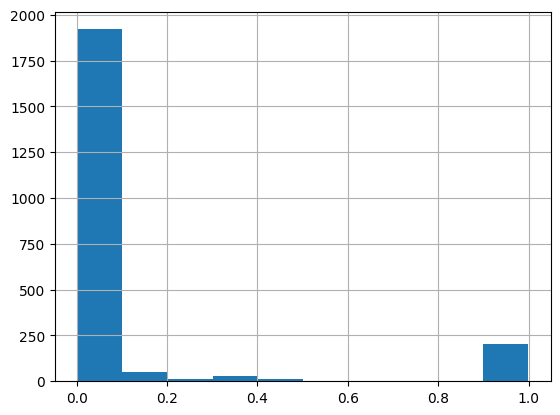

In [106]:
only_deaths_original.corrected_weights.hist()


In [107]:
only_deaths_original.corrected_weights.sum()


252.00000000000006

## Inverse percentage calculation (char_preds)

In [108]:
char_preds_original


,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,0,1,0.803,0.197,Luwin,NaN,1,Westeros,NaN,...,NaN,NaN,0,0,NaN,0,0,1,0.351171,0
1942,1943,0,1,0.987,0.013,Reek,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.096990,0
1943,1944,1,1,0.520,0.480,Symeon Star-Eyes,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.030100,1
1944,1945,1,1,0.637,0.363,Coldhands,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.130435,1


In [109]:
char_preds_original.columns


Index(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'title', 'male',
       'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations',
       'isPopular', 'popularity', 'isAlive'],
      dtype='object')

In [110]:
char_preds_droped_cols


['S.No',
 'pred',
 'actual',
 'alive',
 'plod',
 'isPopular',
 'culture',
 'dateOfBirth',
 'DateoFdeath',
 'age',
 'title',
 'mother',
 'father',
 'heir',
 'spouse',
 'isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse']

In [111]:
char_preds_original.isna().sum()


S.No                    0
actual                  0
pred                    0
alive                   0
plod                    0
name                    0
title                1008
male                    0
culture              1269
dateOfBirth          1513
DateoFdeath          1502
mother               1925
father               1920
heir                 1923
house                 427
spouse               1670
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                  1513
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
dtype: int64

In [112]:
char_preds_original.isAliveFather.value_counts(dropna=False)


isAliveFather
NaN    1920
0.0      21
1.0       5
Name: count, dtype: int64

In [113]:
char_preds_original.isAliveHeir.value_counts(dropna=False)


isAliveHeir
NaN    1923
1.0      15
0.0       8
Name: count, dtype: int64

In [114]:
char_preds_original.isAliveMother.value_counts(dropna=False)


isAliveMother
NaN    1925
1.0      15
0.0       6
Name: count, dtype: int64

In [115]:
char_preds_original.isAliveSpouse.value_counts(dropna=False)


isAliveSpouse
NaN    1670
1.0     215
0.0      61
Name: count, dtype: int64

In [116]:
char_preds_original.name.value_counts()


name
Viserys II Targaryen        1
Otho Bracken                1
Raymund Frey                1
Raynard Ruttiger            1
Red Alyn of the Rosewood    1
                           ..
Jon Cupps                   1
Jommy                       1
Jommo                       1
Johanna Swann               1
Tytos Lannister             1
Name: count, Length: 1946, dtype: int64

In [117]:
# Calculate frequency
frequency = char_preds_original['name'].value_counts()

# Calculate total observations
total_observations = len(char_preds_original)

# Calculate percentage of appearance
percentage_appearance = frequency / total_observations * 100

# Calculate inverse percentage
inverse_percentage = 100 - percentage_appearance

# Normalize weights to
weights = inverse_percentage/100

# Map weights back to the original dataframe
char_preds_original['weights'] = char_preds_original['name'].map(weights)


In [118]:
char_preds_original


,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive,weights
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,NaN,0,0,NaN,11,1,1,0.605351,0,0.999486
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,1.0,1,1,97.0,1,1,1,0.896321,1,0.999486
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,0,1,NaN,0,0,0,0.267559,1,0.999486
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,0.0,1,1,23.0,0,0,0,0.183946,0,0.999486
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,1.0,1,1,29.0,0,0,0,0.043478,1,0.999486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,0,1,0.803,0.197,Luwin,NaN,1,Westeros,NaN,...,NaN,0,0,NaN,0,0,1,0.351171,0,0.999486
1942,1943,0,1,0.987,0.013,Reek,NaN,1,NaN,NaN,...,NaN,0,0,NaN,0,0,0,0.096990,0,0.999486
1943,1944,1,1,0.520,0.480,Symeon Star-Eyes,NaN,1,NaN,NaN,...,NaN,0,0,NaN,0,0,0,0.030100,1,0.999486
1944,1945,1,1,0.637,0.363,Coldhands,NaN,1,NaN,NaN,...,NaN,0,0,NaN,0,0,0,0.130435,1,0.999486


In [119]:
char_preds.isAlive.value_counts()


isAlive
1    1451
0     495
Name: count, dtype: int64

### Add isAlive column to only_deaths_with fill with 0 (because they are dead)

In [120]:
only_deaths.columns = ['Allegiance', 'Death No.', 'Episode', 'Killer', 'Killers House',
       'Location', 'Method', 'name', 'Season']


In [121]:
only_deaths['isAlive'] = 0


In [122]:
only_deaths


,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,name,Season,isAlive
0,Night's Watch,1,1,White Walker,NaN,Beyond the Wall,Ice sword,Waymar Royce,1,0
1,Night's Watch,2,1,White Walker,NaN,Beyond the Wall,Ice sword,Gared,1,0
2,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1,0
3,NaN,4,1,Direwolf,NaN,Winterfell,Teeth,Stag,1,0
4,NaN,5,1,Stag,NaN,Winterfell,Antler,Direwolf,1,0
...,...,...,...,...,...,...,...,...,...,...
2219,NaN,2207,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0
2220,NaN,2208,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0
2221,NaN,2209,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0
2222,NaN,2210,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0


In [123]:
only_deaths_wo_deathno.columns


Index(['allegiance', 'killer', 'killers_house', 'location', 'method', 'name',
       'episode_global_num', 'weights_simple'],
      dtype='object')

In [124]:
char_preds_aliveupdated_episodenum= char_preds.merge(only_deaths['isAlive'], left_on=char_preds["name"].str.lower(), right_on=only_deaths["name"].str.lower(), how='left', suffixes=(None, '_y'))


In [125]:
char_preds_merged_only_deaths= char_preds.merge(only_deaths['isAlive'], left_on=char_preds["name"].str.lower(), right_on=only_deaths["name"].str.lower(), how='left', suffixes=(None, '_y'))


In [126]:
char_preds_merged_only_deaths_case_insensitive= char_preds.merge(only_deaths['isAlive'], left_on=char_preds["name"].str.lower(), right_on=only_deaths["name"].str.lower(), how='left', suffixes=(None, '_y'))


In [127]:
char_preds_merged_only_deaths_case_insensitive


,key_0,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive,isAlive_y
0,viserys ii targaryen,Viserys II Targaryen,1,No house,0,0,0,0,0,0,0,11,1,0.605351,0,NaN
1,walder frey,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,1,0.0
2,addison hill,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0.267559,1,NaN
3,aemma arryn,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0,NaN
4,sylva santagar,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,0,0,0.043478,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,luwin,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,0.351171,0,NaN
1943,reek,Reek,1,House Bolton,0,1,0,1,1,0,0,0,0,0.096990,0,NaN
1944,symeon star-eyes,Symeon Star-Eyes,1,No house,1,1,1,1,1,0,0,0,0,0.030100,1,NaN
1945,coldhands,Coldhands,1,Three-eyed crow,0,0,1,1,1,0,0,0,0,0.130435,1,NaN


In [128]:
only_deaths.isAlive.value_counts(dropna=False)


isAlive
0    2224
Name: count, dtype: int64

In [129]:
char_preds_merged_only_deaths.isAlive.value_counts(dropna=False)


isAlive
1    1451
0     496
Name: count, dtype: int64

In [130]:
char_preds_merged_only_deaths_case_insensitive.isAlive.value_counts(dropna=False)


isAlive
1    1451
0     496
Name: count, dtype: int64

In [131]:
char_preds_merged_only_deaths.isAlive_y.value_counts(dropna=False)


isAlive_y
NaN    1830
0.0     117
Name: count, dtype: int64

In [132]:
char_preds_merged_only_deaths_case_insensitive.isAlive_y.value_counts(dropna=False)


isAlive_y
NaN    1830
0.0     117
Name: count, dtype: int64

**Case-insensitive give the same results as without taking care of it...** (code is above)

In [133]:
# Creating the 'isAlive_updated' column
char_preds_merged_only_deaths['isAlive_updated'] = char_preds_merged_only_deaths.apply(lambda row: row['isAlive_y'] if (row['isAlive'] == 1 and row['isAlive_y'] == 0) else row['isAlive'], axis=1)


In [134]:
char_preds_merged_only_deaths.isAlive_updated.value_counts(dropna=False)


isAlive_updated
1.0    1393
0.0     554
Name: count, dtype: int64

In [135]:
char_preds_droped_cols


['S.No',
 'pred',
 'actual',
 'alive',
 'plod',
 'isPopular',
 'culture',
 'dateOfBirth',
 'DateoFdeath',
 'age',
 'title',
 'mother',
 'father',
 'heir',
 'spouse',
 'isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse']

In [136]:
char_preds_merged_only_deaths


,key_0,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive,isAlive_y,isAlive_updated
0,viserys ii targaryen,Viserys II Targaryen,1,No house,0,0,0,0,0,0,0,11,1,0.605351,0,NaN,0.0
1,walder frey,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,1,0.0,0.0
2,addison hill,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0.267559,1,NaN,1.0
3,aemma arryn,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0,NaN,0.0
4,sylva santagar,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,0,0,0.043478,1,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,luwin,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,0.351171,0,NaN,0.0
1943,reek,Reek,1,House Bolton,0,1,0,1,1,0,0,0,0,0.096990,0,NaN,0.0
1944,symeon star-eyes,Symeon Star-Eyes,1,No house,1,1,1,1,1,0,0,0,0,0.030100,1,NaN,1.0
1945,coldhands,Coldhands,1,Three-eyed crow,0,0,1,1,1,0,0,0,0,0.130435,1,NaN,1.0


In [137]:
char_preds_merged_only_deaths.columns


Index(['key_0', 'name', 'male', 'house', 'book1', 'book2', 'book3', 'book4',
       'book5', 'isMarried', 'isNoble', 'numDeadRelations',
       'boolDeadRelations', 'popularity', 'isAlive', 'isAlive_y',
       'isAlive_updated'],
      dtype='object')

In [138]:
char_preds_merged_only_deaths_updated = char_preds_merged_only_deaths.drop(labels=['key_0','isAlive_y','isAlive'], axis=1)


In [139]:
char_preds_merged_only_deaths_updated.rename(columns={"isAlive_updated": "isAlive"},inplace=True)


In [140]:
char_preds_merged_only_deaths_updated


,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive
0,Viserys II Targaryen,1,No house,0,0,0,0,0,0,0,11,1,0.605351,0.0
1,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,0.0
2,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0.267559,1.0
3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0.0
4,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,0,0,0.043478,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,0.351171,0.0
1943,Reek,1,House Bolton,0,1,0,1,1,0,0,0,0,0.096990,0.0
1944,Symeon Star-Eyes,1,No house,1,1,1,1,1,0,0,0,0,0.030100,1.0
1945,Coldhands,1,Three-eyed crow,0,0,1,1,1,0,0,0,0,0.130435,1.0


In [141]:
#write csv isAlive_updated
#char_preds_merged_only_deaths_updated.to_csv('data/20231128_char_pred_isAlive_updated.csv')


In [142]:
only_deaths.shape


(2224, 10)

In [143]:
only_deaths_original.shape


(2224, 11)

In [144]:
only_deaths_wo_deathno_nodupl.shape


(487, 8)

In [145]:
only_deaths_wo_deathno_nodupl['name'].value_counts(dropna=False)


name
Wildling                   32
Night's Watch brother      24
Lannister soldier          21
Sons of the Harpy agent    19
Peasant                    19
                           ..
Talisa Stark                1
Grey Wind                   1
Robb Stark                  1
Joyeuse Frey                1
Daenerys Targaryen          1
Name: count, Length: 253, dtype: int64

In [146]:
only_deaths_wo_deathno_nodupl['name'].value_counts(dropna=False).value_counts()


count
1     221
2       9
4       5
3       5
19      2
10      2
32      1
24      1
21      1
18      1
17      1
16      1
12      1
8       1
7       1
Name: count, dtype: int64

## Rui's scrapped houses data

In [147]:
scrapped_houses_data = pd.read_csv('../raw_data/merged_dataframe.csv')


In [148]:
scrapped_houses_data.head()


,Character_Name,Culture,Born,Died,Character_Titles,Aliases,Father,Mother,Spouse,Allegiances,...,Heir,Overlord,Founded,Founder,Died Out,Ancestral Weapons,Cadet Branches,Sworn Members,Overloard_Number,Overlord_Name
0,NaN,Braavosi,NaN,NaN,[''],['The Daughter of the Dusk'],0,0,0,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Walder,NaN,NaN,NaN,[''],['Hodor'],0,0,0,['https://www.anapioficeandfire.com/api/houses...,...,NaN,https://www.anapioficeandfire.com/api/houses/16,Age of Heroes,https://www.anapioficeandfire.com/api/characte...,NaN,['Ice'],['https://www.anapioficeandfire.com/api/houses...,['https://www.anapioficeandfire.com/api/charac...,16.0,House Baratheon of King's Landing
2,NaN,NaN,NaN,NaN,[''],['Lamprey'],0,0,0,['https://www.anapioficeandfire.com/api/houses...,...,https://www.anapioficeandfire.com/api/characte...,https://www.anapioficeandfire.com/api/houses/16,284 AC,https://www.anapioficeandfire.com/api/characte...,NaN,[''],[],['https://www.anapioficeandfire.com/api/charac...,16.0,House Baratheon of King's Landing
3,NaN,Braavosi,NaN,NaN,[''],['The Merling Queen'],0,0,0,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,[''],['Old Crackbones'],0,0,0,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
scrapped_houses_data.columns


Index(['Character_Name', 'Culture', 'Born', 'Died', 'Character_Titles',
       'Aliases', 'Father', 'Mother', 'Spouse', 'Allegiances', 'Books',
       'POV Books', 'TV Series', 'Played By', 'Character_Number',
       'Most_Common_Allegiance', 'First_Allegiance_Number', 'House_Allegiance',
       'House_Region', 'Coat of Arms', 'Words', 'Titles_y', 'Seats',
       'Current Lord', 'Heir', 'Overlord', 'Founded', 'Founder', 'Died Out',
       'Ancestral Weapons', 'Cadet Branches', 'Sworn Members',
       'Overloard_Number', 'Overlord_Name'],
      dtype='object')

In [150]:
columns_to_keep = ['Character_Name','Culture','House_Allegiance','House_Region','Overlord_Name']

scrapped_houses_data = scrapped_houses_data[columns_to_keep]


In [151]:
scrapped_houses_data.head()


,Character_Name,Culture,House_Allegiance,House_Region,Overlord_Name
0,NaN,Braavosi,NaN,NaN,NaN
1,Walder,NaN,House Stark of Winterfell,The North,House Baratheon of King's Landing
2,NaN,NaN,House Baratheon of Dragonstone,The Crownlands,House Baratheon of King's Landing
3,NaN,Braavosi,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [152]:
scrapped_houses_data.columns = ['name', 'Culture', 'House_Allegiance', 'House_Region',
       'Overlord_Name']


In [153]:
scrapped_houses_data.head()


,name,Culture,House_Allegiance,House_Region,Overlord_Name
0,NaN,Braavosi,NaN,NaN,NaN
1,Walder,NaN,House Stark of Winterfell,The North,House Baratheon of King's Landing
2,NaN,NaN,House Baratheon of Dragonstone,The Crownlands,House Baratheon of King's Landing
3,NaN,Braavosi,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [154]:
# Checking common values between scrapped_houses_data and only_deaths
common_values_scrap_onlydeaths = only_deaths[only_deaths['name'].isin(scrapped_houses_data['name'])]

# Values in scrapped_houses_data not in only_deaths
values_in_scrapped_not_in_only_deaths = scrapped_houses_data[~scrapped_houses_data['name'].isin(only_deaths['name'])]

# Values in only_deaths not in scrapped_houses_data
values_in_only_deaths_not_in_scrapped = only_deaths[~only_deaths['name'].isin(scrapped_houses_data['name'])]


In [155]:
common_values_scrap_onlydeaths


,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,name,Season,isAlive
0,Night's Watch,1,1,White Walker,NaN,Beyond the Wall,Ice sword,Waymar Royce,1,0
1,Night's Watch,2,1,White Walker,NaN,Beyond the Wall,Ice sword,Gared,1,0
2,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1,0
5,House Arryn,6,1,Lysa Arryn,House Arryn,King's Landing,Poison,Jon Arryn,1,0
8,Smallfolk,9,2,"Sandor ""the Hound"" Clegane",House Lannister,Kingsroad,Sword,Mycah,1,0
...,...,...,...,...,...,...,...,...,...,...
1979,House Lannister,2223,5,Daenerys Targaryen,House Targaryen,King's Landing,Rubble,Cersei Lannister,8,0
1980,House Lannister,2222,5,Daenerys Targaryen,House Targaryen,King's Landing,Rubble,Jaime Lannister,8,0
1981,House Lannister,1780,5,Grey Worm,House Targaryen,King's Landing,Spear,Harry Strickland,8,0
1995,House Targaryen,1380,5,Daenerys Targaryen,House Targaryen,Dragonstone,Dragonfire (Dragon),Varys,8,0


In [156]:
common_values_scrap_onlydeaths.name.value_counts()


name
Beric Dondarrion      2
Waymar Royce          1
Meryn Trant           1
Bowen Marsh           1
Arthur Dayne          1
                     ..
Hoster Tully          1
Doreah                1
Xaro Xhoan Daxos      1
Pyat Pree             1
Daenerys Targaryen    1
Name: count, Length: 116, dtype: int64

In [157]:
values_in_scrapped_not_in_only_deaths


,name,Culture,House_Allegiance,House_Region,Overlord_Name
0,NaN,Braavosi,NaN,NaN,NaN
1,Walder,NaN,House Stark of Winterfell,The North,House Baratheon of King's Landing
2,NaN,NaN,House Baratheon of Dragonstone,The Crownlands,House Baratheon of King's Landing
3,NaN,Braavosi,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2129,Zei,NaN,NaN,NaN,NaN
2130,Zekko,Dothraki,NaN,NaN,NaN
2131,Zharaq zo Loraq,Ghiscari,NaN,NaN,NaN
2132,Zollo,Dothraki,NaN,NaN,NaN


In [158]:
values_in_only_deaths_not_in_scrapped


,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,name,Season,isAlive
3,NaN,4,1,Direwolf,NaN,Winterfell,Teeth,Stag,1,0
4,NaN,5,1,Stag,NaN,Winterfell,Antler,Direwolf,1,0
6,Dothraki,7,1,Dothraki man,Dothraki,Pentos,Arakh,Dothraki man,1,0
7,NaN,8,2,Summer,House Stark,Winterfell,Teeth,Catspaw assassin,1,0
9,House Stark,10,2,Ned Stark,House Stark,Kingsroad,Knife,Lady,1,0
...,...,...,...,...,...,...,...,...,...,...
2218,NaN,2206,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0
2219,NaN,2207,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0
2220,NaN,2208,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0
2221,NaN,2209,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0


In [159]:
char_preds.columns


Index(['name', 'male', 'house', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'numDeadRelations', 'boolDeadRelations',
       'popularity', 'isAlive'],
      dtype='object')

In [160]:
# Checking common values between scrapped_houses_data and char_preds
common_values_scrap_char_preds = char_preds[char_preds['name'].isin(scrapped_houses_data['name'])]

# Values in scrapped_houses_data not in char_preds
values_in_scrapped_not_in_char_preds = scrapped_houses_data[~scrapped_houses_data['name'].isin(char_preds['name'])]

# Values in char_preds not in scrapped_houses_data
values_in_char_preds_not_in_scrapped = char_preds[~char_preds['name'].isin(scrapped_houses_data['name'])]


In [161]:
scrapped_houses_data.head(4)


,name,Culture,House_Allegiance,House_Region,Overlord_Name
0,NaN,Braavosi,NaN,NaN,NaN
1,Walder,NaN,House Stark of Winterfell,The North,House Baratheon of King's Landing
2,NaN,NaN,House Baratheon of Dragonstone,The Crownlands,House Baratheon of King's Landing
3,NaN,Braavosi,NaN,NaN,NaN


In [162]:
common_values_scrap_char_preds


,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive
1,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,1
2,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0.267559,1
3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0
4,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,0,0,0.043478,1
5,Tommen Baratheon,1,No house,0,0,0,0,0,0,0,5,1,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,Laena Velaryon,0,House Velaryon,0,0,0,0,0,1,0,0,0,0.140468,0
1941,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,0.351171,0
1943,Symeon Star-Eyes,1,No house,1,1,1,1,1,0,0,0,0,0.030100,1
1944,Coldhands,1,Three-eyed crow,0,0,1,1,1,0,0,0,0,0.130435,1


In [163]:
values_in_scrapped_not_in_char_preds


,name,Culture,House_Allegiance,House_Region,Overlord_Name
0,NaN,Braavosi,NaN,NaN,NaN
1,Walder,NaN,House Stark of Winterfell,The North,House Baratheon of King's Landing
2,NaN,NaN,House Baratheon of Dragonstone,The Crownlands,House Baratheon of King's Landing
3,NaN,Braavosi,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2084,Wayn,Northmen,House Stark of Winterfell,The North,House Baratheon of King's Landing
2107,Willow,Free Folk,NaN,NaN,NaN
2114,Wyl,Northmen,House Stark of Winterfell,The North,House Baratheon of King's Landing
2115,Wyl,NaN,NaN,NaN,NaN


In [164]:
values_in_char_preds_not_in_scrapped


,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive
0,Viserys II Targaryen,1,No house,0,0,0,0,0,0,0,11,1,0.605351,0
7,Viserys I Targaryen,1,No house,0,0,0,0,0,0,0,5,1,0.678930,0
11,Will (orphan),0,No house,0,0,0,1,0,0,0,0,0,0.003344,1
12,Will (squire),1,No house,0,0,0,0,0,0,0,0,0,0.003344,1
13,Will (Standfast),0,House Osgrey,0,0,0,0,0,0,0,0,0,0.003344,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,Qarl the Maid,1,No house,0,1,1,1,1,0,0,0,0,0.066890,1
1893,Steelskin,1,House of Loraq,0,0,0,0,1,0,0,0,0,0.016722,1
1899,Damon Dance-for-Me,1,House Bolton,0,0,0,0,1,0,0,0,0,0.033445,1
1937,Symon Silver Tongue,1,No house,0,1,1,0,1,0,0,0,0,0.046823,0


In [165]:
common_values_onlydeaths_char_preds


,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,name,Season
0,Night's Watch,1,1,White Walker,NaN,Beyond the Wall,Ice sword,Waymar Royce,1
1,Night's Watch,2,1,White Walker,NaN,Beyond the Wall,Ice sword,Gared,1
2,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1
5,House Arryn,6,1,Lysa Arryn,House Arryn,King's Landing,Poison,Jon Arryn,1
8,Smallfolk,9,2,"Sandor ""the Hound"" Clegane",House Lannister,Kingsroad,Sword,Mycah,1
...,...,...,...,...,...,...,...,...,...
1979,House Lannister,2223,5,Daenerys Targaryen,House Targaryen,King's Landing,Rubble,Cersei Lannister,8
1980,House Lannister,2222,5,Daenerys Targaryen,House Targaryen,King's Landing,Rubble,Jaime Lannister,8
1981,House Lannister,1780,5,Grey Worm,House Targaryen,King's Landing,Spear,Harry Strickland,8
1995,House Targaryen,1380,5,Daenerys Targaryen,House Targaryen,Dragonstone,Dragonfire (Dragon),Varys,8


In [166]:
char_preds_merged_only_deaths_updated


,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive
0,Viserys II Targaryen,1,No house,0,0,0,0,0,0,0,11,1,0.605351,0.0
1,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,0.0
2,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0.267559,1.0
3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0.0
4,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,0,0,0.043478,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,0.351171,0.0
1943,Reek,1,House Bolton,0,1,0,1,1,0,0,0,0,0.096990,0.0
1944,Symeon Star-Eyes,1,No house,1,1,1,1,1,0,0,0,0,0.030100,1.0
1945,Coldhands,1,Three-eyed crow,0,0,1,1,1,0,0,0,0,0.130435,1.0


# Wednesday 29

In [167]:
char_preds_raw = pd.read_csv('../raw_data/character-predictions.csv')


In [168]:
char_preds_raw.columns


Index(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'title', 'male',
       'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations',
       'isPopular', 'popularity', 'isAlive'],
      dtype='object')

In [169]:
only_deaths_episode_updated = only_deaths_wo_deathno.copy()


In [170]:
char_preds_isAlive_updated = char_preds_merged_only_deaths_updated.copy()


In [171]:
char_preds_isAlive_updated.columns


Index(['name', 'male', 'house', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'numDeadRelations', 'boolDeadRelations',
       'popularity', 'isAlive'],
      dtype='object')

In [172]:
only_deaths_episode_updated.shape


(2224, 8)

In [173]:
char_preds_isAlive_updated.shape


(1947, 14)

In [174]:
# Checking common values between only_deaths_episode_updated and char_preds_isAlive_updated
common_values_between_onlydeathsUp_charpredsUP = char_preds_isAlive_updated[char_preds_isAlive_updated['name'].isin(only_deaths_episode_updated['name'])]

# Values in only_deaths_episode_updated not in char_preds_isAlive_updated
values_in_onlydeathsUp_in_charpredsUP = only_deaths_episode_updated[~only_deaths_episode_updated['name'].isin(char_preds_isAlive_updated['name'])]

# Values in char_preds_isAlive_updated not in only_deaths_episode_updated
values_in_charpredsUP_onlydeathsUp = char_preds_isAlive_updated[~char_preds_isAlive_updated['name'].isin(only_deaths_episode_updated['name'])]


In [175]:
new_line = '\n'
print(f"In common= {common_values_between_onlydeathsUp_charpredsUP.shape[0]}, {new_line} Values in only_deaths_episode_updated not in char_preds_isAlive_updated {values_in_onlydeathsUp_in_charpredsUP.shape[0]}, {new_line} Values in char_preds_isAlive_updated not in only_deaths_episode_updated {values_in_charpredsUP_onlydeathsUp.shape[0]}" )


In common= 117, 
 Values in only_deaths_episode_updated not in char_preds_isAlive_updated 2107, 
 Values in char_preds_isAlive_updated not in only_deaths_episode_updated 1830


In [176]:
char_preds_isAlive_updated.columns


Index(['name', 'male', 'house', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'numDeadRelations', 'boolDeadRelations',
       'popularity', 'isAlive'],
      dtype='object')

In [177]:
only_deaths_episode_updated.columns


Index(['allegiance', 'killer', 'killers_house', 'location', 'method', 'name',
       'episode_global_num', 'weights_simple'],
      dtype='object')

In [178]:
char_preds_UP_merged_only_deaths_UP= char_preds_isAlive_updated.merge(only_deaths_episode_updated['episode_global_num'], left_on=char_preds_isAlive_updated["name"].str.lower(), right_on=only_deaths_episode_updated["name"].str.lower(), how='left', suffixes=(None, '_y'))


In [179]:
char_preds_UP_merged_only_deaths_UP


,key_0,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive,episode_global_num
0,viserys ii targaryen,Viserys II Targaryen,1,No house,0,0,0,0,0,0,0,11,1,0.605351,0.0,NaN
1,walder frey,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,0.0,60.0
2,addison hill,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0.267559,1.0,NaN
3,aemma arryn,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0.0,NaN
4,sylva santagar,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,0,0,0.043478,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,luwin,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,0.351171,0.0,NaN
1945,reek,Reek,1,House Bolton,0,1,0,1,1,0,0,0,0,0.096990,0.0,NaN
1946,symeon star-eyes,Symeon Star-Eyes,1,No house,1,1,1,1,1,0,0,0,0,0.030100,1.0,NaN
1947,coldhands,Coldhands,1,Three-eyed crow,0,0,1,1,1,0,0,0,0,0.130435,1.0,NaN


In [180]:
char_preds_UP_merged_only_deaths_UP.episode_global_num.notna().sum()


119

In [181]:
char_preds_UP_merged_only_deaths_UP.drop('key_0',axis=1, inplace=True)


In [182]:
char_preds_UP_merged_only_deaths_UP.columns


Index(['name', 'male', 'house', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'numDeadRelations', 'boolDeadRelations',
       'popularity', 'isAlive', 'episode_global_num'],
      dtype='object')

In [183]:
char_preds_UP_merged_only_deaths_UP.duplicated().sum()


2

In [184]:
char_preds_UP_merged_only_deaths_UP[char_preds_UP_merged_only_deaths_UP.duplicated(keep=False)]


,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive,episode_global_num
1658,Beric Dondarrion,1,No house,1,1,1,1,1,0,1,0,0,0.434783,0.0,24.0
1659,Beric Dondarrion,1,No house,1,1,1,1,1,0,1,0,0,0.434783,0.0,70.0
1660,Beric Dondarrion,1,No house,1,1,1,1,1,0,1,0,0,0.434783,0.0,24.0
1661,Beric Dondarrion,1,No house,1,1,1,1,1,0,1,0,0,0.434783,0.0,70.0


In [185]:
char_preds_UP_merged_only_deaths_UP.drop_duplicates(inplace=True)


In [186]:
char_preds_UP_merged_only_deaths_UP.duplicated().sum()


0

In [187]:
char_preds_UP_merged_only_deaths_UP.isna().sum()


name                     0
male                     0
house                    0
book1                    0
book2                    0
book3                    0
book4                    0
book5                    0
isMarried                0
isNoble                  0
numDeadRelations         0
boolDeadRelations        0
popularity               0
isAlive                  0
episode_global_num    1830
dtype: int64

In [188]:
char_preds_UP_merged_only_deaths_UP.house.value_counts(dropna=False)


house
No house           428
Night's Watch      105
House Frey          97
House Stark         72
House Targaryen     62
                  ... 
House Gower          1
House Borrell        1
Citadel              1
Wise Masters         1
Three-eyed crow      1
Name: count, Length: 348, dtype: int64

In [189]:
char_preds_UP_merged_only_deaths_UP.isAlive.value_counts(dropna=False)


isAlive
1.0    1393
0.0     554
Name: count, dtype: int64

## Checking houses file from Franziska

In [190]:
char_preds_raw.columns


Index(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'title', 'male',
       'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations',
       'isPopular', 'popularity', 'isAlive'],
      dtype='object')

In [191]:
origins_table = pd.read_csv('../features_for_quiz/houses/origins.txt')


In [192]:
origins_table


,culture,house,origin
0,NaN,Alchemists' Guild,Noble
1,NaN,Antler Men,Peasant
2,Tyroshi,Band of Nine,Foreign Peasant
3,NaN,Black Ears,Peasant
4,Vale mountain clans,Black Ears,Outlaw
...,...,...,...
482,Tyroshi,NaN,Foreign Noble
483,Valyrian,NaN,Foreign Peasant
484,Westeros,NaN,Peasant
485,Wildlings,NaN,Wildling


In [193]:
char_preds_house_culture = char_preds_raw[['name', 'culture','house']]


In [194]:
char_preds_house_culture


,name,culture,house
0,Viserys II Targaryen,NaN,NaN
1,Walder Frey,Rivermen,House Frey
2,Addison Hill,NaN,House Swyft
3,Aemma Arryn,NaN,House Arryn
4,Sylva Santagar,Dornish,House Santagar
...,...,...,...
1941,Luwin,Westeros,House Stark
1942,Reek,NaN,House Bolton
1943,Symeon Star-Eyes,NaN,NaN
1944,Coldhands,NaN,Three-eyed crow


In [195]:
char_preds_house_culture['res'] = 0


/var/folders/zy/9r4gn9b574gdnv2l9zms0bz40000gn/T/ipykernel_50247/1947260906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  char_preds_house_culture['res'] = 0


In [196]:
char_preds_house_culture


,name,culture,house,res
0,Viserys II Targaryen,NaN,NaN,0
1,Walder Frey,Rivermen,House Frey,0
2,Addison Hill,NaN,House Swyft,0
3,Aemma Arryn,NaN,House Arryn,0
4,Sylva Santagar,Dornish,House Santagar,0
...,...,...,...,...
1941,Luwin,Westeros,House Stark,0
1942,Reek,NaN,House Bolton,0
1943,Symeon Star-Eyes,NaN,NaN,0
1944,Coldhands,NaN,Three-eyed crow,0


In [197]:
result_df = char_preds_house_culture.merge(origins_table, on=['culture', 'house'], how='left')


In [198]:
result_df


,name,culture,house,res,origin
0,Viserys II Targaryen,NaN,NaN,0,NaN
1,Walder Frey,Rivermen,House Frey,0,House Frey
2,Addison Hill,NaN,House Swyft,0,House Lannister
3,Aemma Arryn,NaN,House Arryn,0,House Arryn
4,Sylva Santagar,Dornish,House Santagar,0,House Martell
...,...,...,...,...,...
1941,Luwin,Westeros,House Stark,0,House Stark
1942,Reek,NaN,House Bolton,0,House Bolton
1943,Symeon Star-Eyes,NaN,NaN,0,NaN
1944,Coldhands,NaN,Three-eyed crow,0,Peasant


In [199]:
result_df.origin.value_counts(dropna=False),result_df.origin.value_counts(dropna=False).count()


(origin
 NaN                244
 House Tyrell       172
 House Stark        161
 House Greyjoy      140
 House Lannister    134
 House Frey         132
 Noble              117
 House Baratheon    107
 Night's Watch      105
 House Targaryen     88
 Foreign Peasant     88
 House Arryn         75
 House Martell       74
 House Tully         71
 Outlaw              68
 Wildling            66
 Foreign Noble       36
 Soldier             26
 Dothraki            18
 Peasant             16
 House Bolton         8
 Name: count, dtype: int64,
 21)

In [200]:
char_preds_raw.house.value_counts(dropna=False), char_preds_raw.house.value_counts(dropna=False).count()


(house
 NaN                427
 Night's Watch      105
 House Frey          97
 House Stark         72
 House Targaryen     62
                   ... 
 House Gower          1
 House Borrell        1
 Citadel              1
 Wise Masters         1
 Three-eyed crow      1
 Name: count, Length: 348, dtype: int64,
 348)

In [201]:
char_preds_UP_merged_only_deaths_UP


,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive,episode_global_num
0,Viserys II Targaryen,1,No house,0,0,0,0,0,0,0,11,1,0.605351,0.0,NaN
1,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,0.0,60.0
2,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0.267559,1.0,NaN
3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0.0,NaN
4,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,0,0,0.043478,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,0.351171,0.0,NaN
1945,Reek,1,House Bolton,0,1,0,1,1,0,0,0,0,0.096990,0.0,NaN
1946,Symeon Star-Eyes,1,No house,1,1,1,1,1,0,0,0,0,0.030100,1.0,NaN
1947,Coldhands,1,Three-eyed crow,0,0,1,1,1,0,0,0,0,0.130435,1.0,NaN


Now fill using our current and most updated dataset char_preds_UP_merged_only_deaths_UP, merge by name

In [202]:
char_preds_UP_merged_only_deaths_UP_origin= char_preds_UP_merged_only_deaths_UP.merge(result_df['origin'], left_on=char_preds_UP_merged_only_deaths_UP["name"].str.lower(), right_on=result_df["name"].str.lower(), how='left', suffixes=(None, '_y'))


In [203]:
char_preds_UP_merged_only_deaths_UP_origin.drop(labels=['key_0'], axis=1, inplace=True)


In [204]:
char_preds_UP_merged_only_deaths_UP_origin.columns


Index(['name', 'male', 'house', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'numDeadRelations', 'boolDeadRelations',
       'popularity', 'isAlive', 'episode_global_num', 'origin'],
      dtype='object')

In [205]:
char_preds_UP_merged_only_deaths_UP_origin = char_preds_UP_merged_only_deaths_UP_origin[['name', 'male', 'origin','book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'numDeadRelations', 'boolDeadRelations',
       'popularity', 'isAlive', 'episode_global_num']]


In [206]:
#char_preds_UP_merged_only_deaths_UP_origin.drop(labels=['house'], axis=1, inplace=True)

#write new csv

#char_preds_UP_merged_only_deaths_UP_origin.to_csv('data/20231129_char_preds_origin_episode_isAlive.csv')


In [207]:
char_preds_UP_merged_only_deaths_UP_origin


,name,male,origin,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive,episode_global_num
0,Viserys II Targaryen,1,NaN,0,0,0,0,0,0,0,11,1,0.605351,0.0,NaN
1,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,0.0,60.0
2,Addison Hill,1,House Lannister,0,0,0,1,0,0,1,0,0,0.267559,1.0,NaN
3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0.0,NaN
4,Sylva Santagar,0,House Martell,0,0,0,1,0,1,1,0,0,0.043478,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,0.351171,0.0,NaN
1943,Reek,1,House Bolton,0,1,0,1,1,0,0,0,0,0.096990,0.0,NaN
1944,Symeon Star-Eyes,1,NaN,1,1,1,1,1,0,0,0,0,0.030100,1.0,NaN
1945,Coldhands,1,Peasant,0,0,1,1,1,0,0,0,0,0.130435,1.0,NaN


In [208]:
!ls data


ls: data: No such file or directory


In [209]:
char_preds_UP_merged_only_deaths_UP_origin.origin.value_counts(dropna=False).count(),new_line ,char_preds_UP_merged_only_deaths_UP_origin.origin.value_counts(dropna=False)


(21,
 '\n',
 origin
 NaN                245
 House Tyrell       172
 House Stark        161
 House Greyjoy      140
 House Lannister    134
 House Frey         132
 Noble              117
 House Baratheon    107
 Night's Watch      105
 House Targaryen     88
 Foreign Peasant     88
 House Arryn         75
 House Martell       74
 House Tully         71
 Outlaw              68
 Wildling            66
 Foreign Noble       36
 Soldier             26
 Dothraki            18
 Peasant             16
 House Bolton         8
 Name: count, dtype: int64)

In [210]:
char_preds_UP_merged_only_deaths_UP_origin.isna().sum()


name                     0
male                     0
origin                 245
book1                    0
book2                    0
book3                    0
book4                    0
book5                    0
isMarried                0
isNoble                  0
numDeadRelations         0
boolDeadRelations        0
popularity               0
isAlive                  0
episode_global_num    1830
dtype: int64

In [211]:
char_preds_UP_merged_only_deaths_UP_origin[char_preds_UP_merged_only_deaths_UP_origin['origin'].isna()]


,name,male,origin,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive,episode_global_num
0,Viserys II Targaryen,1,NaN,0,0,0,0,0,0,0,11,1,0.605351,0.0,NaN
5,Tommen Baratheon,1,NaN,0,0,0,0,0,0,0,5,1,1.000000,0.0,60.0
7,Viserys I Targaryen,1,NaN,0,0,0,0,0,0,0,5,1,0.678930,0.0,NaN
8,Wilbert,1,NaN,0,0,1,0,0,0,1,0,0,0.006689,0.0,NaN
11,Will (orphan),0,NaN,0,0,0,1,0,0,0,0,0,0.003344,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,Shae,0,NaN,1,1,1,1,1,0,0,0,0,0.290970,0.0,40.0
1866,Vyman,0,NaN,1,1,1,1,1,0,1,0,0,0.040134,1.0,NaN
1901,Alysanne Targaryen,0,NaN,0,0,0,0,0,0,0,0,0,0.277592,0.0,NaN
1938,Symon Silver Tongue,1,NaN,0,1,1,0,1,0,0,0,0,0.046823,0.0,NaN


In [212]:
char_preds_UP_merged_only_deaths_UP_origin\
[char_preds_UP_merged_only_deaths_UP_origin['origin'].\
 isna()].name.unique()


array(['Viserys II Targaryen', 'Tommen Baratheon', 'Viserys I Targaryen',
       'Wilbert', 'Will (orphan)', 'Will (squire)', 'Willam', 'Willifer',
       'Willum', 'Woth', 'Wyl the Whittler', 'Wun Weg Wun Dar Wun',
       'Yormwell', 'Ysilla', 'Zarabelo', 'Zei', 'Joffrey Baratheon',
       'Maegor I Targaryen', 'Qyle', 'Rafe', 'Rainbow Knight', 'Randa',
       'Rawney', 'Redtusk', 'Reysen', 'Rigney', 'Robb Stark', 'Robin',
       'Roger of Pennytree', 'Rolfe', 'Roone', 'Roone (maester)', 'Rosey',
       'Runciter', 'Ryam', 'Saathos', 'Scarb', 'Sedgekins', 'Sharna',
       'Shella', 'Sherrit', 'Sky Blue Su', 'Stannis Baratheon',
       'Tansy (orphan)', 'Tarber', 'Theobald', 'Timon', 'Todric',
       'Tothmure', 'Tristifer V Mudd', 'Tristifer IV Mudd', 'Tuffleberry',
       'Turquin', 'Urreg', 'Uthor Underleaf', 'Vaellyn', 'Violet',
       'Wat (orphan)', 'Wat (sailor)', 'Weasel', 'Addam',
       'Aegon I Targaryen', 'Aegon II Targaryen', 'Aegon IV Targaryen',
       'Aenys I Targaryen

In [213]:
char_preds_UP_merged_only_deaths_UP_origin.columns


Index(['name', 'male', 'origin', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'numDeadRelations', 'boolDeadRelations',
       'popularity', 'isAlive', 'episode_global_num'],
      dtype='object')

In [214]:
char_preds_UP_merged_only_deaths_UP_origin.shape


(1947, 15)

In [215]:
# Checking common values between char_preds_UP_merged_only_deaths_UP_origin and scrapped_houses_data
char_preds_UP_merged_only_deaths_UP_origin = char_preds_UP_merged_only_deaths_UP_origin.merge(char_preds_raw['house'], left_on=char_preds_UP_merged_only_deaths_UP_origin["name"].str.lower(), right_on=char_preds_raw["name"].str.lower(), how='left', suffixes=(None, '_y'))


In [216]:
char_preds_UP_merged_only_deaths_UP_origin.shape


(1947, 17)

In [217]:
char_preds_UP_merged_only_deaths_UP_origin['house'].value_counts()


house
Night's Watch      105
House Frey          97
House Stark         72
House Targaryen     62
House Lannister     49
                  ... 
House Gower          1
House Borrell        1
Citadel              1
Wise Masters         1
Three-eyed crow      1
Name: count, Length: 347, dtype: int64

In [218]:
char_preds_UP_merged_only_deaths_UP_origin.drop(labels=['key_0'], axis=1, inplace=True)


In [219]:
char_preds_UP_merged_only_deaths_UP_origin.head()


,name,male,origin,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive,episode_global_num,house
0,Viserys II Targaryen,1,NaN,0,0,0,0,0,0,0,11,1,0.605351,0.0,NaN,NaN
1,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,0.0,60.0,House Frey
2,Addison Hill,1,House Lannister,0,0,0,1,0,0,1,0,0,0.267559,1.0,NaN,House Swyft
3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0.0,NaN,House Arryn
4,Sylva Santagar,0,House Martell,0,0,0,1,0,1,1,0,0,0.043478,1.0,NaN,House Santagar


In [220]:
#no_house_rows = char_preds_UP_merged_only_deaths_UP_origin[char_preds_UP_merged_only_deaths_UP_origin['origin'] == 'No house']


In [221]:
#type(no_house_rows.name.unique()[0])


In [222]:
char_preds_UP_merged_only_deaths_UP_origin['origin'].notnull().sum()


1702

In [223]:
char_preds_UP_merged_only_deaths_UP_origin


,name,male,origin,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive,episode_global_num,house
0,Viserys II Targaryen,1,NaN,0,0,0,0,0,0,0,11,1,0.605351,0.0,NaN,NaN
1,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,0.0,60.0,House Frey
2,Addison Hill,1,House Lannister,0,0,0,1,0,0,1,0,0,0.267559,1.0,NaN,House Swyft
3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0.0,NaN,House Arryn
4,Sylva Santagar,0,House Martell,0,0,0,1,0,1,1,0,0,0.043478,1.0,NaN,House Santagar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,0.351171,0.0,NaN,House Stark
1943,Reek,1,House Bolton,0,1,0,1,1,0,0,0,0,0.096990,0.0,NaN,House Bolton
1944,Symeon Star-Eyes,1,NaN,1,1,1,1,1,0,0,0,0,0.030100,1.0,NaN,NaN
1945,Coldhands,1,Peasant,0,0,1,1,1,0,0,0,0,0.130435,1.0,NaN,Three-eyed crow


In [224]:
filtered_only_dead = char_preds_UP_merged_only_deaths_UP_origin[char_preds_UP_merged_only_deaths_UP_origin['isAlive']==0]


In [225]:
filtered_only_dead.shape


(554, 16)

In [226]:
filtered_only_dead.head()


,name,male,origin,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive,episode_global_num,house
0,Viserys II Targaryen,1,NaN,0,0,0,0,0,0,0,11,1,0.605351,0.0,NaN,NaN
1,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,0.0,60.0,House Frey
3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0.0,NaN,House Arryn
5,Tommen Baratheon,1,NaN,0,0,0,0,0,0,0,5,1,1.000000,0.0,60.0,NaN
6,Valarr Targaryen,1,House Targaryen,0,0,0,0,0,1,1,0,0,0.431438,0.0,NaN,House Targaryen


In [227]:
#write new csv

#filtered_only_dead.to_csv('data/20231129_char_preds_filtered_only_dead.csv')


In [228]:
char_preds_UP_merged_only_deaths_UP_origin.isna().sum()


name                     0
male                     0
origin                 245
book1                    0
book2                    0
book3                    0
book4                    0
book5                    0
isMarried                0
isNoble                  0
numDeadRelations         0
boolDeadRelations        0
popularity               0
isAlive                  0
episode_global_num    1830
house                  428
dtype: int64

In [229]:
houses_list = pd.read_csv('../features_for_quiz/houses/list_of_houses.csv').drop('Unnamed: 0', axis=1)


In [230]:
houses_list


,class,new
0,Wildling,Wildling
1,Outlaw,Outlaw
2,Dothraki,Dothraki
3,Night's Watch,Night's Watch
4,Soldier,Soldier
5,Foreign Noble,Foreign Noble
6,Foreign Peasant,Foreign Peasant
7,Noble,Noble
8,Peasant,Peasant
9,House Bolton,Bolton


In [231]:
houses_list = houses_list[['class']]
houses_list['new'] = 0


In [232]:
#to remove house in class:
for i in range(len(houses_list['class'])):
    if houses_list['class'][i].find('House') == 0:
        houses_list['new'][i]=houses_list['class'][i].replace('House','')
    else:
        houses_list['new'][i]=houses_list['class'][i]


/var/folders/zy/9r4gn9b574gdnv2l9zms0bz40000gn/T/ipykernel_50247/2636266214.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses_list['new'][i]=houses_list['class'][i]
/var/folders/zy/9r4gn9b574gdnv2l9zms0bz40000gn/T/ipykernel_50247/2636266214.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Wildling' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  houses_list['new'][i]=houses_list['class'][i]


In [233]:
houses_list.head()


,class,new
0,Wildling,Wildling
1,Outlaw,Outlaw
2,Dothraki,Dothraki
3,Night's Watch,Night's Watch
4,Soldier,Soldier


In [234]:
def updated_origin(row):
    # Check if 'origin' is NaN
    if pd.isna(row['origin']):
        for _, house_row in houses_list.iterrows():
            if house_row['new'] in row['name']:
                return house_row['class']
    return row['origin']


In [235]:
char_preds_UP_merged_only_deaths_UP_origin.origin.value_counts(dropna=False).count(),char_preds_UP_merged_only_deaths_UP_origin.origin.value_counts(dropna=False)


(21,
 origin
 NaN                245
 House Tyrell       172
 House Stark        161
 House Greyjoy      140
 House Lannister    134
 House Frey         132
 Noble              117
 House Baratheon    107
 Night's Watch      105
 House Targaryen     88
 Foreign Peasant     88
 House Arryn         75
 House Martell       74
 House Tully         71
 Outlaw              68
 Wildling            66
 Foreign Noble       36
 Soldier             26
 Dothraki            18
 Peasant             16
 House Bolton         8
 Name: count, dtype: int64)

In [236]:
char_preds_UP_merged_only_deaths_UP_origin['origin'] = char_preds_UP_merged_only_deaths_UP_origin.apply(updated_origin, axis=1)


In [237]:
char_preds_UP_merged_only_deaths_UP_origin.origin.value_counts(dropna=False).count(),char_preds_UP_merged_only_deaths_UP_origin.origin.value_counts(dropna=False)


(21,
 origin
 NaN                217
 House Tyrell       174
 House Stark        162
 House Greyjoy      141
 House Lannister    136
 House Frey         134
 Noble              117
 House Baratheon    110
 Night's Watch      105
 House Targaryen    104
 Foreign Peasant     88
 House Martell       75
 House Arryn         75
 House Tully         71
 Outlaw              68
 Wildling            66
 Foreign Noble       36
 Soldier             26
 Dothraki            18
 Peasant             16
 House Bolton         8
 Name: count, dtype: int64)

In [238]:
char_preds_UP_merged_only_deaths_UP_origin\
[char_preds_UP_merged_only_deaths_UP_origin['origin'].\
 isna()].name.unique()


array(['Wilbert', 'Will (orphan)', 'Will (squire)', 'Willam', 'Willifer',
       'Willum', 'Woth', 'Wyl the Whittler', 'Wun Weg Wun Dar Wun',
       'Yormwell', 'Ysilla', 'Zarabelo', 'Zei', 'Qyle', 'Rafe',
       'Rainbow Knight', 'Randa', 'Rawney', 'Redtusk', 'Reysen', 'Rigney',
       'Robin', 'Roger of Pennytree', 'Rolfe', 'Roone', 'Roone (maester)',
       'Rosey', 'Runciter', 'Ryam', 'Saathos', 'Scarb', 'Sedgekins',
       'Sharna', 'Shella', 'Sherrit', 'Sky Blue Su', 'Tansy (orphan)',
       'Tarber', 'Theobald', 'Timon', 'Todric', 'Tothmure',
       'Tristifer V Mudd', 'Tristifer IV Mudd', 'Tuffleberry', 'Turquin',
       'Urreg', 'Uthor Underleaf', 'Vaellyn', 'Violet', 'Wat (orphan)',
       'Wat (sailor)', 'Weasel', 'Addam', 'Aethelmure', 'Agrivane',
       'Alaric of Eysen', 'Alia', 'All-for-Joffrey', 'Alyce', 'Armen',
       'Arneld', 'Arrec Durrandon', 'Barre', 'Beck', 'Beldecar', 'Bella',
       'Ben', 'Benedict', 'Bennet', 'Beron Blacktyde', 'Bessa',
       'Bethany Fair-

In [239]:
char_preds_UP_merged_only_deaths_UP_origin\
[char_preds_UP_merged_only_deaths_UP_origin['origin'].\
 isna()].name.nunique()


216

In [240]:
char_preds_raw.head()


,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [241]:
only_deaths_original.head()


,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season,weights,corrected_weights
0,Night's Watch,1,1,White Walker,NaN,Beyond the Wall,Ice sword,Waymar Royce,1,0.99955,0.99955
1,Night's Watch,2,1,White Walker,NaN,Beyond the Wall,Ice sword,Gared,1,0.99955,0.99955
2,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1,0.99955,0.99955
3,NaN,4,1,Direwolf,NaN,Winterfell,Teeth,Stag,1,0.99955,0.99955
4,NaN,5,1,Stag,NaN,Winterfell,Antler,Direwolf,1,0.99955,0.99955


In [242]:
char_preds_UP_merged_only_deaths_UP_origin.head()


,name,male,origin,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive,episode_global_num,house
0,Viserys II Targaryen,1,House Targaryen,0,0,0,0,0,0,0,11,1,0.605351,0.0,NaN,NaN
1,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,0.0,60.0,House Frey
2,Addison Hill,1,House Lannister,0,0,0,1,0,0,1,0,0,0.267559,1.0,NaN,House Swyft
3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0.0,NaN,House Arryn
4,Sylva Santagar,0,House Martell,0,0,0,1,0,1,1,0,0,0.043478,1.0,NaN,House Santagar


In [243]:
char_preds_UP_merged_only_deaths_UP_origin.isAlive.value_counts()


isAlive
1.0    1393
0.0     554
Name: count, dtype: int64

In [244]:
if_dead = char_preds_UP_merged_only_deaths_UP_origin['isAlive']==0
if_episode_na = char_preds_UP_merged_only_deaths_UP_origin.episode_global_num.isna()


In [245]:
char_preds_UP_merged_only_deaths_UP_origin


,name,male,origin,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive,episode_global_num,house
0,Viserys II Targaryen,1,House Targaryen,0,0,0,0,0,0,0,11,1,0.605351,0.0,NaN,NaN
1,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,0.0,60.0,House Frey
2,Addison Hill,1,House Lannister,0,0,0,1,0,0,1,0,0,0.267559,1.0,NaN,House Swyft
3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0.0,NaN,House Arryn
4,Sylva Santagar,0,House Martell,0,0,0,1,0,1,1,0,0,0.043478,1.0,NaN,House Santagar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,0.351171,0.0,NaN,House Stark
1943,Reek,1,House Bolton,0,1,0,1,1,0,0,0,0,0.096990,0.0,NaN,House Bolton
1944,Symeon Star-Eyes,1,NaN,1,1,1,1,1,0,0,0,0,0.030100,1.0,NaN,NaN
1945,Coldhands,1,Peasant,0,0,1,1,1,0,0,0,0,0.130435,1.0,NaN,Three-eyed crow


In [246]:
char_preds_UP_merged_only_deaths_UP_origin\
[char_preds_UP_merged_only_deaths_UP_origin['origin'].\
 isna()].name.unique()


array(['Wilbert', 'Will (orphan)', 'Will (squire)', 'Willam', 'Willifer',
       'Willum', 'Woth', 'Wyl the Whittler', 'Wun Weg Wun Dar Wun',
       'Yormwell', 'Ysilla', 'Zarabelo', 'Zei', 'Qyle', 'Rafe',
       'Rainbow Knight', 'Randa', 'Rawney', 'Redtusk', 'Reysen', 'Rigney',
       'Robin', 'Roger of Pennytree', 'Rolfe', 'Roone', 'Roone (maester)',
       'Rosey', 'Runciter', 'Ryam', 'Saathos', 'Scarb', 'Sedgekins',
       'Sharna', 'Shella', 'Sherrit', 'Sky Blue Su', 'Tansy (orphan)',
       'Tarber', 'Theobald', 'Timon', 'Todric', 'Tothmure',
       'Tristifer V Mudd', 'Tristifer IV Mudd', 'Tuffleberry', 'Turquin',
       'Urreg', 'Uthor Underleaf', 'Vaellyn', 'Violet', 'Wat (orphan)',
       'Wat (sailor)', 'Weasel', 'Addam', 'Aethelmure', 'Agrivane',
       'Alaric of Eysen', 'Alia', 'All-for-Joffrey', 'Alyce', 'Armen',
       'Arneld', 'Arrec Durrandon', 'Barre', 'Beck', 'Beldecar', 'Bella',
       'Ben', 'Benedict', 'Bennet', 'Beron Blacktyde', 'Bessa',
       'Bethany Fair-

In [247]:
char_preds_UP_merged_only_deaths_UP_origin\
[char_preds_UP_merged_only_deaths_UP_origin['origin'].\
 isna()].name.nunique()


216

In [248]:
only_deaths_wo_deathno.shape


(2224, 8)

In [249]:
only_deaths_wo_deathno['name'].duplicated().sum()


1971

In [250]:
duplicated_names_from_only_deads = only_deaths_wo_deathno[only_deaths_wo_deathno['name'].duplicated(keep=False)]


In [251]:
duplicated_names_from_only_deads.allegiance.value_counts(dropna=False)


allegiance
House Lannister                      815
NaN                                  413
Free Folk                            109
House Stark                          100
Sons of the Harpy                     68
House Bolton                          62
House Baratheon of Dragonstone        61
House Frey                            58
Night's Watch                         57
House Targaryen                       53
Faith Militant                        50
House Greyjoy                         36
Smallfolk                             33
House Baratheon of King's Landing     18
Dothraki                              17
The Masters                           12
Wise Masters                          11
Brotherhood Without Banners            8
The Thirteen                           8
House Mormont                          7
Good Masters                           6
Great Masters                          4
Children of the Forest                 4
House Baelish                          3
House

In [252]:

duplicated_names_from_only_deads.dropna(subset=['allegiance'], inplace=True)


/var/folders/zy/9r4gn9b574gdnv2l9zms0bz40000gn/T/ipykernel_50247/133975615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_names_from_only_deads.dropna(subset=['allegiance'], inplace=True)


In [253]:
duplicated_names_from_only_deads.allegiance.value_counts(dropna=False).count(), duplicated_names_from_only_deads.allegiance.value_counts(dropna=False)


(25,
 allegiance
 House Lannister                      815
 Free Folk                            109
 House Stark                          100
 Sons of the Harpy                     68
 House Bolton                          62
 House Baratheon of Dragonstone        61
 House Frey                            58
 Night's Watch                         57
 House Targaryen                       53
 Faith Militant                        50
 House Greyjoy                         36
 Smallfolk                             33
 House Baratheon of King's Landing     18
 Dothraki                              17
 The Masters                           12
 Wise Masters                          11
 Brotherhood Without Banners            8
 The Thirteen                           8
 House Mormont                          7
 Good Masters                           6
 Great Masters                          4
 Children of the Forest                 4
 House Baelish                          3
 House Martell   

In [254]:
char_preds_UP_merged_only_deaths_UP_origin.isna().sum()


name                     0
male                     0
origin                 217
book1                    0
book2                    0
book3                    0
book4                    0
book5                    0
isMarried                0
isNoble                  0
numDeadRelations         0
boolDeadRelations        0
popularity               0
isAlive                  0
episode_global_num    1830
house                  428
dtype: int64

In [255]:
char_preds_UP_merged_only_deaths_UP_origin.isNoble.value_counts()


isNoble
0    1049
1     898
Name: count, dtype: int64

In [256]:
char_preds_UP_merged_only_deaths_UP_origin.isMarried.value_counts()


isMarried
0    1671
1     276
Name: count, dtype: int64

In [257]:
char_preds_UP_merged_only_deaths_UP_origin\
[char_preds_UP_merged_only_deaths_UP_origin['origin'].\
isna()].isAlive.value_counts()


isAlive
1.0    180
0.0     37
Name: count, dtype: int64

In [258]:
char_preds_UP_merged_only_deaths_UP_origin.drop('house', axis=1,inplace=True)


In [259]:
rows_wo_origin = char_preds_UP_merged_only_deaths_UP_origin[char_preds_UP_merged_only_deaths_UP_origin.origin.isna()]


In [260]:
!ls ../processed_data/data_cleaned_Carmen


20231127_char_pred.csv
20231128_char_pred_isAlive_updated.csv
20231128_only_deaths_ep_weights.csv
20231129_char_preds_filtered_only_dead.csv
20231129_char_preds_origin_episode_isAlive copy.csv
20231129_char_preds_origin_episode_isAlive.csv
20231130_rows_without_origin.csv


In [261]:
#Create csv of char_preds that have NaNs in origin
#rows_wo_origin.to_csv('../processed_data/data_cleaned_Carmen/20231130_rows_without_origin.csv')


In [262]:
houses_list


,class,new
0,Wildling,Wildling
1,Outlaw,Outlaw
2,Dothraki,Dothraki
3,Night's Watch,Night's Watch
4,Soldier,Soldier
5,Foreign Noble,Foreign Noble
6,Foreign Peasant,Foreign Peasant
7,Noble,Noble
8,Peasant,Peasant
9,House Bolton,Bolton


In [263]:
list(houses_list['class'])


['Wildling',
 'Outlaw',
 'Dothraki',
 "Night's Watch",
 'Soldier',
 'Foreign Noble',
 'Foreign Peasant',
 'Noble',
 'Peasant',
 'House Bolton',
 'House Stark',
 'House Arryn',
 'House Greyjoy',
 'House Frey',
 'House Tully',
 'House Lannister',
 'House Tyrell',
 'House Martell',
 'House Baratheon',
 'House Targaryen']

In [264]:
char_preds_UP_merged_only_deaths_UP_origin.origin.value_counts(dropna=False, normalize=True)


origin
NaN                0.111454
House Tyrell       0.089368
House Stark        0.083205
House Greyjoy      0.072419
House Lannister    0.069851
House Frey         0.068824
Noble              0.060092
House Baratheon    0.056497
Night's Watch      0.053929
House Targaryen    0.053416
Foreign Peasant    0.045198
House Martell      0.038521
House Arryn        0.038521
House Tully        0.036466
Outlaw             0.034926
Wildling           0.033898
Foreign Noble      0.018490
Soldier            0.013354
Dothraki           0.009245
Peasant            0.008218
House Bolton       0.004109
Name: proportion, dtype: float64

In [265]:
# Your list of classes from houses_list
class_list = np.array(houses_list['class'])

type(class_list), class_list.shape


(numpy.ndarray, (20,))

In [266]:
char_preds_UP_merged_only_deaths_UP_origin.origin.value_counts(dropna=True, normalize=True)


origin
House Tyrell       0.100578
House Stark        0.093642
House Greyjoy      0.081503
House Lannister    0.078613
House Frey         0.077457
Noble              0.067630
House Baratheon    0.063584
Night's Watch      0.060694
House Targaryen    0.060116
Foreign Peasant    0.050867
House Arryn        0.043353
House Martell      0.043353
House Tully        0.041040
Outlaw             0.039306
Wildling           0.038150
Foreign Noble      0.020809
Soldier            0.015029
Dothraki           0.010405
Peasant            0.009249
House Bolton       0.004624
Name: proportion, dtype: float64

In [267]:
class_list_probs = (1 -char_preds_UP_merged_only_deaths_UP_origin.origin.value_counts(dropna=True, normalize=True))

class_list_probs


origin
House Tyrell       0.899422
House Stark        0.906358
House Greyjoy      0.918497
House Lannister    0.921387
House Frey         0.922543
Noble              0.932370
House Baratheon    0.936416
Night's Watch      0.939306
House Targaryen    0.939884
Foreign Peasant    0.949133
House Arryn        0.956647
House Martell      0.956647
House Tully        0.958960
Outlaw             0.960694
Wildling           0.961850
Foreign Noble      0.979191
Soldier            0.984971
Dothraki           0.989595
Peasant            0.990751
House Bolton       0.995376
Name: proportion, dtype: float64

In [268]:
class_list_probs = char_preds_UP_merged_only_deaths_UP_origin.origin.value_counts(dropna=True, normalize=True)


In [269]:
class_list_probs.sum()


1.0

In [270]:
class_list_probs = np.array(class_list_probs)


In [271]:
class_list_probs.shape


(20,)

In [272]:
class_list_probs


array([0.10057803, 0.09364162, 0.08150289, 0.07861272, 0.07745665,
       0.06763006, 0.06358382, 0.06069364, 0.06011561, 0.05086705,
       0.0433526 , 0.0433526 , 0.04104046, 0.03930636, 0.03815029,
       0.02080925, 0.0150289 , 0.01040462, 0.00924855, 0.00462428])

In [273]:
# Your list of classes from houses_list
class_list = list(houses_list['class'])

# Replace NaN values in 'origin' with random choices from class_list
char_preds_UP_merged_only_deaths_UP_origin['origin'] = char_preds_UP_merged_only_deaths_UP_origin['origin'].apply(
    lambda l: l if pd.notna(l) else np.random.choice(a=class_list, p =class_list_probs)
)


In [274]:
char_preds_UP_merged_only_deaths_UP_origin.origin.value_counts(dropna=False)


origin
House Tyrell       177
House Stark        171
House Greyjoy      147
House Lannister    141
House Frey         140
Noble              128
Night's Watch      124
House Baratheon    111
House Targaryen    105
Foreign Peasant    100
Wildling            90
House Arryn         86
Outlaw              85
House Tully         80
House Martell       78
Foreign Noble       50
Soldier             39
Dothraki            38
Peasant             35
House Bolton        22
Name: count, dtype: int64

In [275]:
rui_episodes = pd.read_csv('../processed_data/data_cleaned_Rui/df_cleaned.csv')


In [277]:
rui_episodes.head(5)


,Unnamed: 0,name,male,origin,isMarried,isNoble,popularity,isAlive,season,episode,deaths,episode_num
0,0,Viserys II Targaryen,1,House Targaryen,0,0,0.605351,0,8,The Bells,Lord Varys - Burned alive by Drogon with his f...,71
1,1,Walder Frey,1,House Frey,1,1,0.896321,0,6,The Winds of Winter,Lord Walder Frey - Throat slit by Arya Stark w...,60
2,2,Addison Hill,1,House Lannister,0,1,0.267559,1,0,NaN,NaN,0
3,3,Aemma Arryn,0,House Arryn,1,1,0.183946,0,5,The Gift,Maester Aemon Targaryen - Died of natural causes.,47
4,4,Sylva Santagar,0,House Martell,1,1,0.043478,1,0,NaN,NaN,0


In [278]:
# Replace NaN values in 'origin' with random choices from class_list
rui_episodes['origin'] = rui_episodes['origin'].apply(
    lambda l: l if pd.notna(l) else np.random.choice(a=class_list, p =class_list_probs)
)


In [282]:
rui_episodes.origin.value_counts(dropna=False)


origin
House Tyrell       180
House Stark        171
House Greyjoy      146
House Frey         145
House Lannister    139
Noble              131
Night's Watch      115
House Baratheon    111
Foreign Peasant    108
House Targaryen    105
Wildling            92
Outlaw              92
House Arryn         87
House Martell       77
House Tully         76
Foreign Noble       48
Dothraki            42
Soldier             39
Peasant             26
House Bolton        19
Name: count, dtype: int64

In [284]:
rui_episodes.columns


Index(['Unnamed: 0', 'name', 'male', 'origin', 'isMarried', 'isNoble',
       'popularity', 'isAlive', 'season', 'episode', 'deaths', 'episode_num'],
      dtype='object')

In [286]:
rui_episodes.drop(labels='Unnamed: 0', axis=1, inplace=True)


In [288]:
rui_episodes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1949 non-null   object 
 1   male         1949 non-null   int64  
 2   origin       1949 non-null   object 
 3   isMarried    1949 non-null   int64  
 4   isNoble      1949 non-null   int64  
 5   popularity   1949 non-null   float64
 6   isAlive      1949 non-null   int64  
 7   season       1949 non-null   int64  
 8   episode      556 non-null    object 
 9   deaths       556 non-null    object 
 10  episode_num  1949 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 167.6+ KB


In [289]:
rui_episodes.to_csv('../processed_data/cleaned_data_final.csv')
